In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
# @Author: Mingyeong Yang (mmingyeong@kasi.re.kr)
# @Date: 2023-11-30
# @Filename: work.ipynb
# work.

import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import sys
import math

import pandas as pd

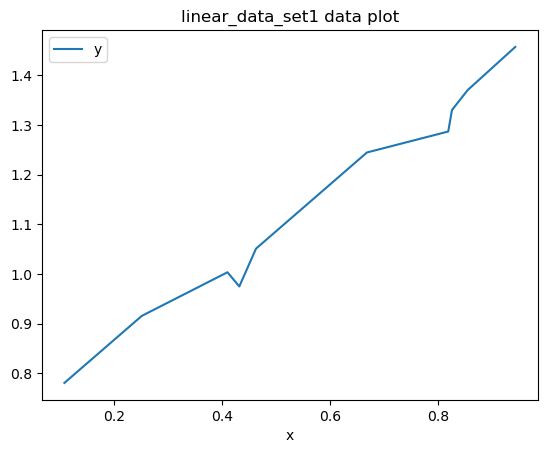

In [2]:
# Data Preparation

linear_data_set1 = "./linear_data.txt"

open_data_set1 = open(linear_data_set1, "r")

df_data_set1 = pd.read_csv(linear_data_set1, sep = ' ', names=["x", "y", "error"], header=None)
#df_MCMC_data_set1 = pd.DataFrame(open_MCMC_data_set1)
# x position y value y error

df_data_set1.plot(kind='line', x="x", y="y", title="linear_data_set1 data plot")
plt.show()


In [3]:
x = df_data_set1["x"]
y = df_data_set1["y"]
error = df_data_set1["error"]

len(x)

10

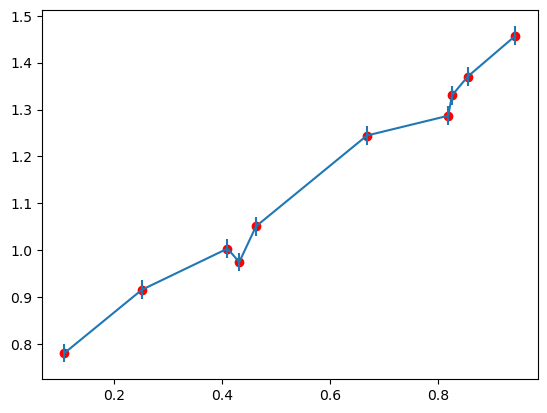

In [4]:
plt.figure()
plt.scatter(x,y, color="r")
plt.errorbar(x,y,error)
plt.show()

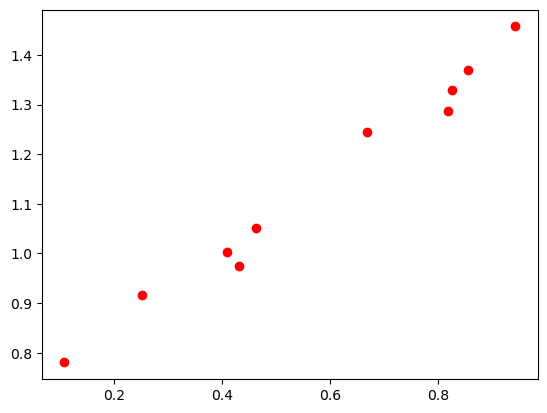

In [5]:
plt.figure()
plt.scatter(x,y, color="r")
plt.show()

In [6]:
len_x = len(x)
len_y = len(y)

print(len_x)
print(len_y)

10
10


In [7]:
def slope_generator(x, y):
    slope_list = []
    for i in (range(0, len_x)):
        if i == 0:
            slope = y[i]/x[i]
            slope_list.append(slope)
        else:
            slope = (y[i]-y[i-1])/(x[i]-x[i-1])
            slope_list.append(slope)
            
    return slope_list

slopes = slope_generator(x,y)
print(slopes)

[7.273066169617893, 0.9414225941422597, 0.553526448362721, -1.305936073059362, 2.458064516129032, 0.942120622568093, 0.2802124833997346, 6.20000000000001, 1.3793103448275863, 0.9852774631936584]


In [8]:
def intercept_generator(x, y):
    intercept_list = []
    for i in (range(0, len_x)):
        if i == 0:
            intercept = 0
            intercept_list.append(intercept)
        else:
            intercept = y[i]-x[i]*(y[i]-y[i-1])/(x[i]-x[i-1])
            intercept_list.append(intercept)
            
    return intercept_list

intercepts = intercept_generator(x,y)
print(intercepts)

[0, 0.6793853556485355, 0.7766309193954659, 1.5380808219178088, -0.08570903225806448, 0.6152634241245137, 1.0574180610889772, -3.7885200000000077, 0.19144137931034488, 0.5281818799546997]


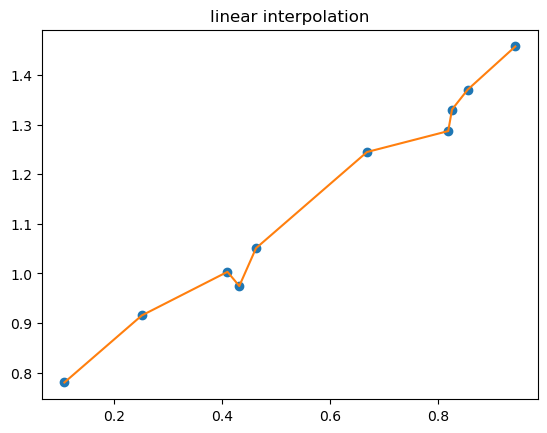

In [9]:
from scipy import interpolate
interpolate_1d = interpolate.interp1d(x,y,kind="linear")
y_new = interpolate_1d(x)

plt.plot(x,y,"o", x, y_new, "-")
plt.title("linear interpolation")
plt.show()

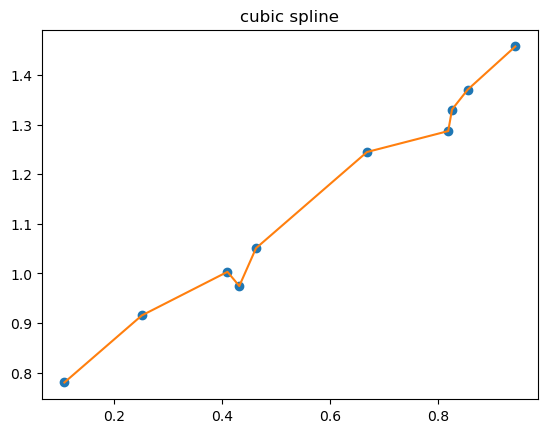

In [10]:
from scipy import interpolate
#interpolate_1d_cubic = interpolate.interp1d(x,y,kind="quadratic") # cubic
interpolate_1d_cubic = interpolate.CubicSpline(x,y) # cubic
y_new_cubic = interpolate_1d_cubic(x)

plt.plot(x,y,"o", x, y_new_cubic)
plt.title("cubic spline")
plt.show()

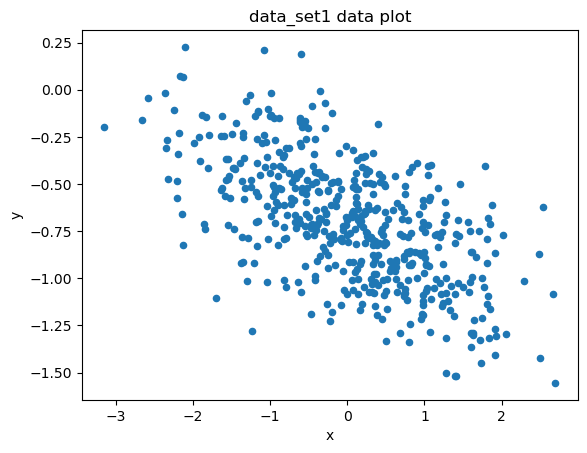

In [11]:
# Data Preparation

data_set = "./gaussian_data_1.txt"

open_data_set = open(data_set, "r")

df_data_set1 = pd.read_csv(data_set, sep = ' ', names=["x", "y"], header=None)
#df_MCMC_data_set1 = pd.DataFrame(open_MCMC_data_set1)
# x position y value y error

df_data_set1.plot(kind='scatter', x="x", y="y", title="data_set1 data plot")
plt.show()


In [12]:
class Cal_sample_statistic:
    """calculate sample statistic 
    
    1. Mean
    2. Geometric mean (can you?!)
    3. Median
    4. Mode
    5. Variance
    6. Standard deviation
    7. Skewness
    8. Kurtosis
    
    """

    def __init__(self, data: list):
        self.data = data
        self.num = len(data)

    def mean(self):
        # mean = sum / num
        sum = 0
        for i in self.data:
            sum = sum + i
        self.num = len(self.data)

        self.mean_val = sum / self.num
        
        return self.mean_val
    
    def geo_mean(self):
        # geo_mean = multip**(1/num)
        multip = 1
        for i in self.data:
            multip = multip*i

        self.geo_mean = multip**(1/self.num)

        return self.geo_mean
    
    def median(self):
        sortlist = sorted(self.data)
        flag = self.num%2
        half = int(self.num/2)
        print(flag)
        if flag == 0:
            fir_term = half - 1
            sec_term = half
            self.median = (sortlist[fir_term] + sortlist[sec_term]) / 2
        else:
            fir_term = (self.num - 1)/2
            print(fir_term)
            self.median = sortlist[fir_term]

        return self.median
    
    def mode(self):
        # mode
        count_dic = {}
        for i in self.data:
            index = 0
            for j in self.data:
                if i==j:
                    index += 1
                else:
                    pass
            
            count_dic[i] = index
        sort_dic = sorted(count_dic.items(), key=lambda x:(-x[1], x[0]))
        mode_tup = sort_dic[0]

        frequency = mode_tup[1]

        if frequency==1:
            self.mode="Not exist"
        else:
            self.mode = mode_tup[0]

        return self.mode


    def variance(self):
        # sum((val - self.mean)**2)/self.num
        sum = 0
        meanval= self.mean()
        for i in self.data:
            comp = (i - meanval)**2
            sum = sum + comp
        
        self.varianceval = sum / self.num
        return self.varianceval

    def StandardDeviation(self):
        # variance**(1/2)
        val=self.variance()
        self.StandardDeviation_val = val**(1/2)
        return self.StandardDeviation_val
    

In [13]:
x = df_data_set1["x"]
y = df_data_set1["y"]


x_cal = Cal_sample_statistic(x)
y_cal = Cal_sample_statistic(y)

x_mean = x_cal.mean()
x_val = x_cal.variance()
y_mean = y_cal.mean()
y_val = y_cal.variance()
x_sigma = x_cal.StandardDeviation()
y_sigma = y_cal.StandardDeviation()

def cov(x, y, x_mu, y_mu):
    # mean = sum / num
    sum = 0
    for i in range(len(x)):
        comp = (x[i]-x_mu)*(y[i]-y_mu)/(len(x)-1)
        sum = sum + comp
        
    return sum

def corr(x, y, cov, x_sigma, y_sigma):
    val = cov/(x_sigma*y_sigma)
        
    return val

cov_cal = cov(x,y,x_mean,y_mean)
corr_cal = corr(x,y,cov_cal,x_sigma,y_sigma)

In [14]:
print(f"x mean = {x_mean}")
print(f"y mean = {y_mean}")
print(f"x variance = {x_val}")
print(f"y variance = {y_val}")
print(f"Covariance between x and y = {cov_cal}")
print(f"Correlation between x and y = {corr_cal}")

x mean = 0.002946000000000004
y mean = -0.6999039999999999
x variance = 1.1017790790840003
y variance = 0.10441743478400003
Covariance between x and y = -0.20846437757114233
Correlation between x and y = -0.6146078213365961


In [15]:
import random

# 지정된 범위 사이의 랜덤한 실수들로 이루어진, 길이가 5인 리스트 생성
len = 500
x_random_list = [random.uniform(-2, 4) for _ in range(len)]
y_random_list = [random.uniform(-1, 2) for _ in range(len)]


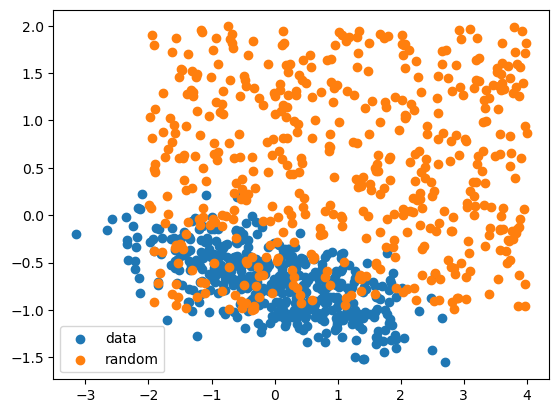

In [16]:
plt.figure()
plt.scatter(x, y, label="data")
plt.scatter(x_random_list, y_random_list, label="random")
plt.legend()
plt.show()

In [17]:
import numpy as np

# Define mean vector
mean = np.array([x_mean, y_mean])

# Define covariance matrix
covariance_matrix = np.array([[x_val, cov_cal],
                              [cov_cal, y_val]])

# Generate synthetic data
num_samples = 1000  # adjust as needed
synthetic_data = np.random.multivariate_normal(mean, covariance_matrix, num_samples)
"""
print(len(synthetic_data))

x_new = []
y_new = []
for i in range(len(synthetic_data)):
    x_new_comp = synthetic_data[i][0]
    x_new.append(x_new_comp)
    y_new_comp = synthetic_data[i][1]
    y_new.append(y_new_comp)

print(x_new)"""

'\nprint(len(synthetic_data))\n\nx_new = []\ny_new = []\nfor i in range(len(synthetic_data)):\n    x_new_comp = synthetic_data[i][0]\n    x_new.append(x_new_comp)\n    y_new_comp = synthetic_data[i][1]\n    y_new.append(y_new_comp)\n\nprint(x_new)'

In [20]:
import numpy as np

# Assuming X is your data matrix

# Center the data
X_centered = x - x_mean

# Calculate the covariance matrix
covariance_matrix = np.array([[x_val, cov_cal], [cov_cal, y_val]])
print(covariance_matrix)

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# eigenvalues: array containing the eigenvalues
# eigenvectors: matrix with each column corresponding to an eigenvector


[[ 1.10177908 -0.20846438]
 [-0.20846438  0.10441743]]
